In [2]:
from titrato.stats import rmsd_curve, area_between_curves
from titrato.sampl import SAMPL6Experiment, TypeIIIPrediction

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.offsetbox import AnchoredText
import matplotlib
import seaborn as sns
from uncertainties import ufloat


%matplotlib inline
sns.set_style("ticks")
font = {'size': 24}
matplotlib.rc('font', **font)

SM01
SM02
SM03


C:\Users\rustenba\AppData\Local\Continuum\miniconda3\envs\pka-model\lib\site-packages\titrato\titrato.py:256: RuntimeWarning: invalid value encountered in log
  free_energies = - np.log(populations)


SM04
SM05
SM06
SM07
SM08
SM09
SM10
SM11
SM12
SM13
SM14
SM15
SM16
SM17
SM18
SM19
SM20
SM21
SM22


C:\Users\rustenba\AppData\Local\Continuum\miniconda3\envs\pka-model\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


SM23
SM24


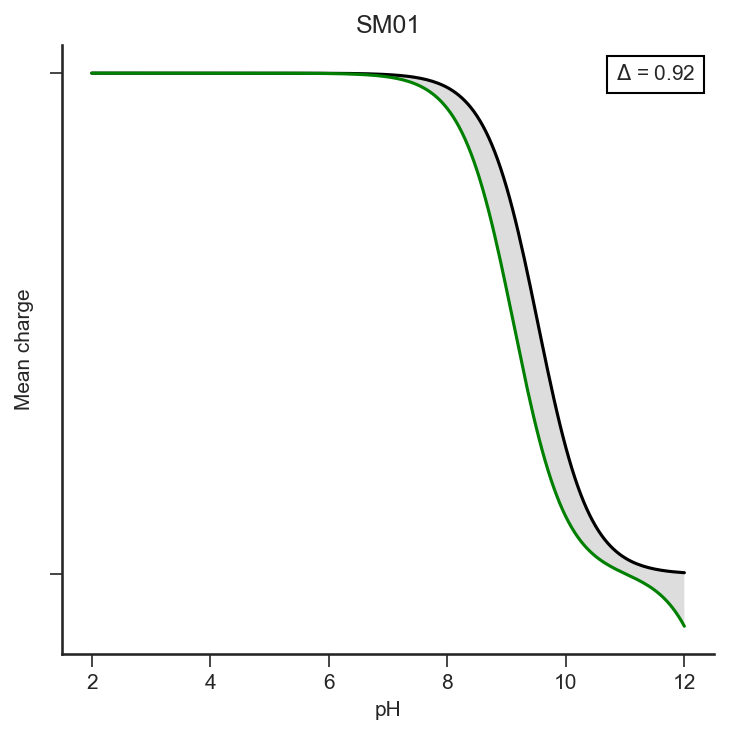

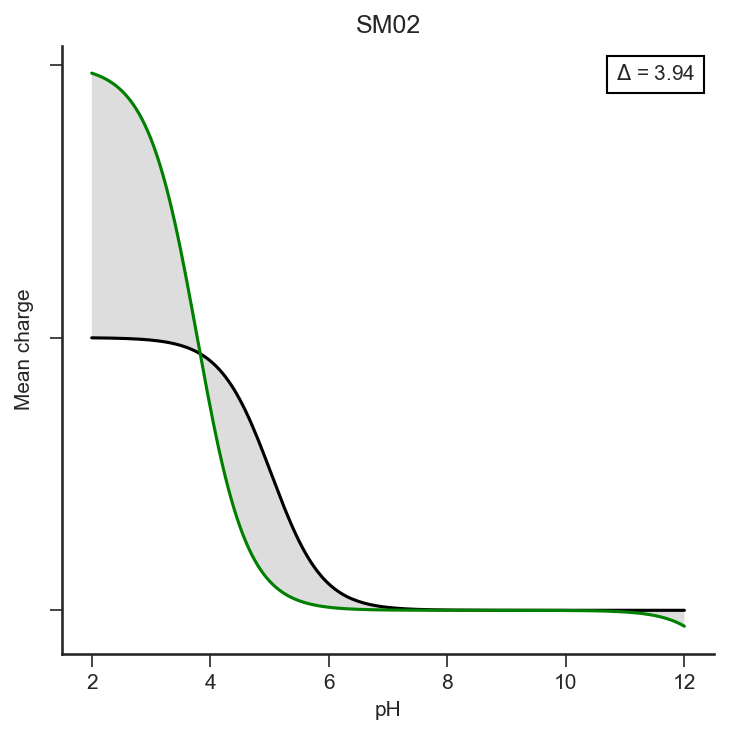

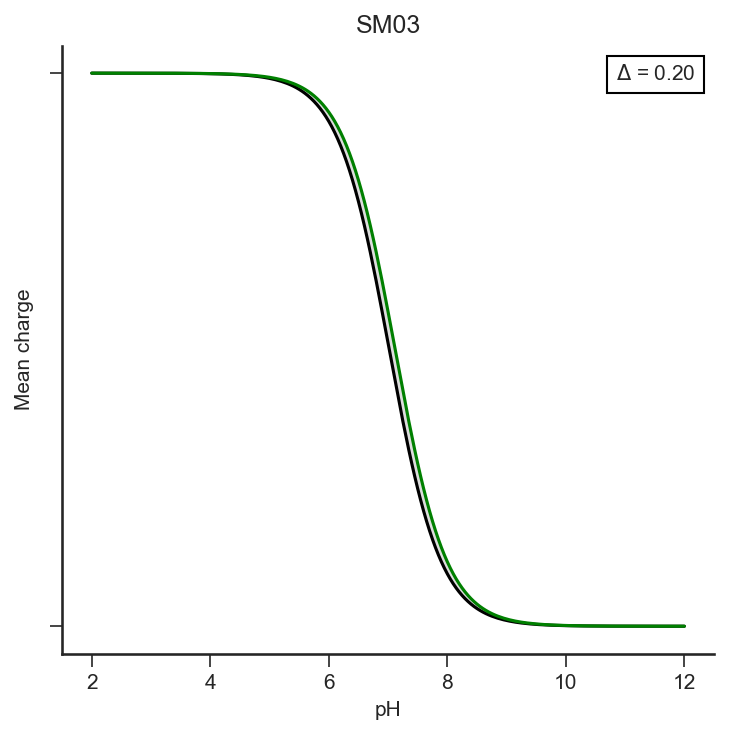

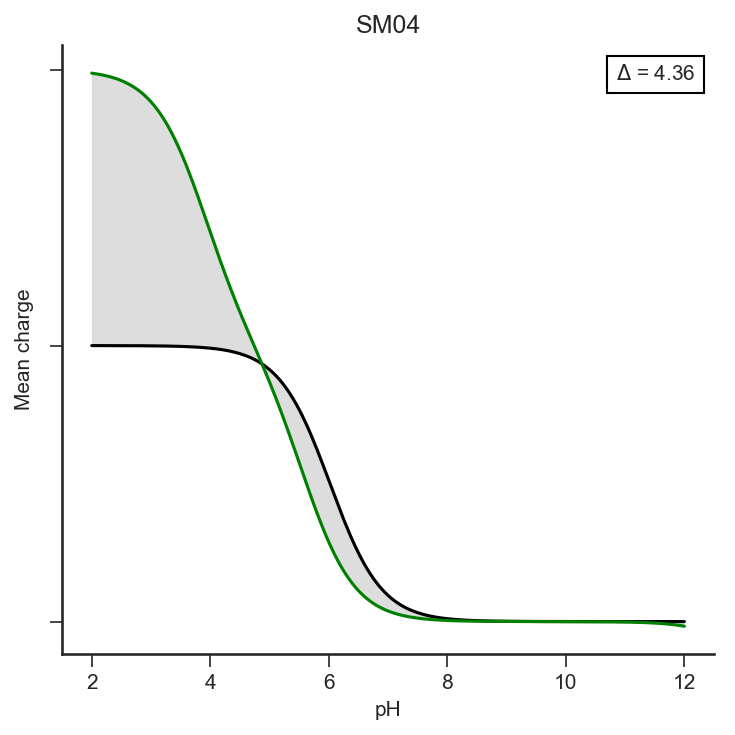

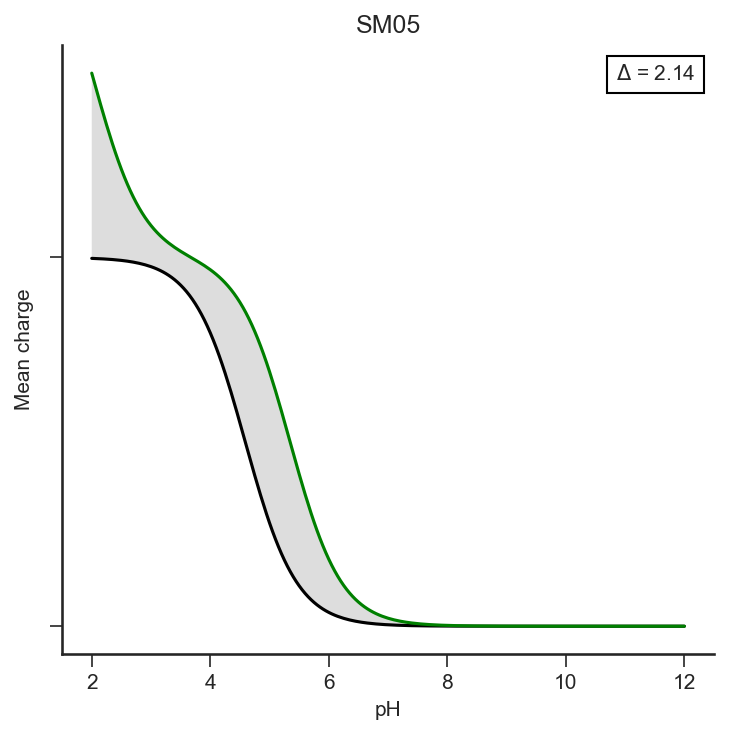

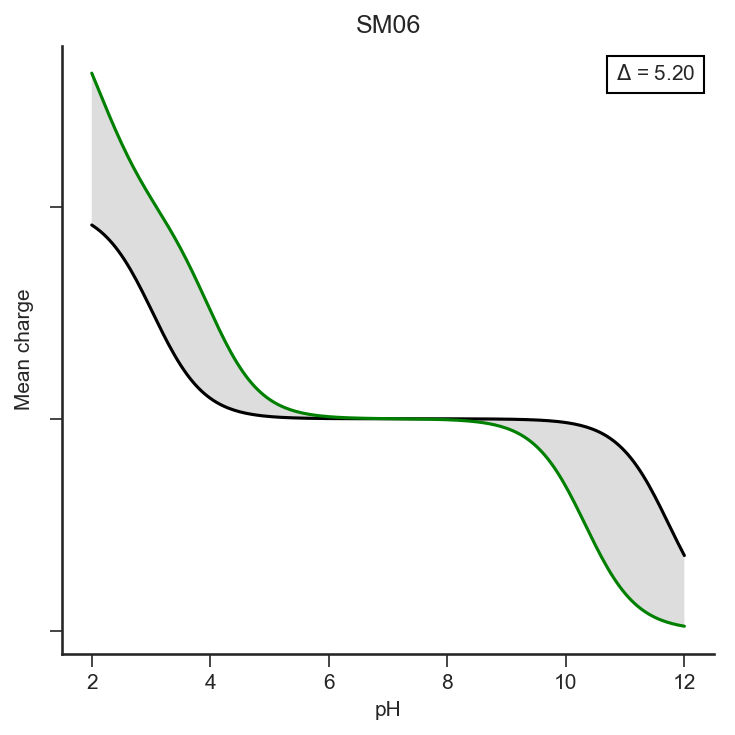

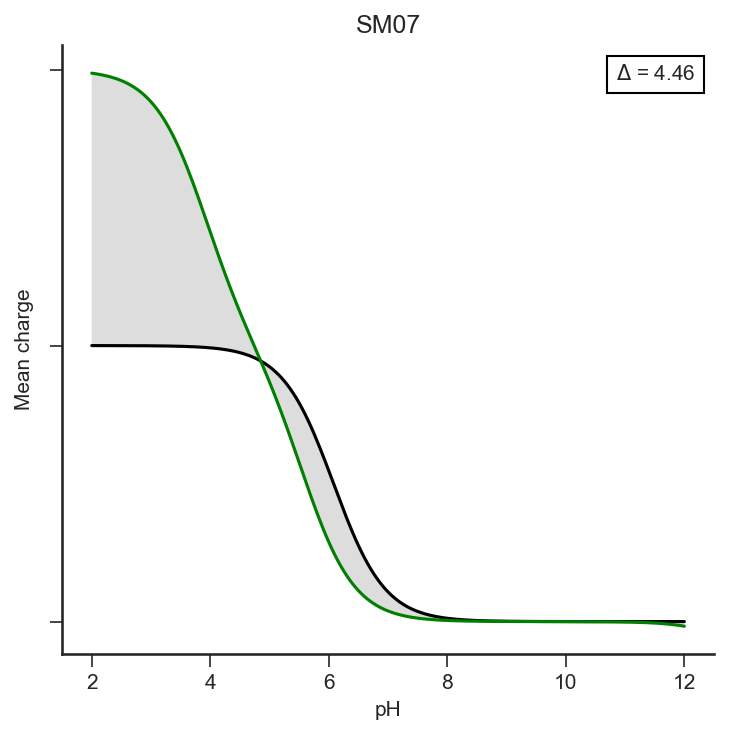

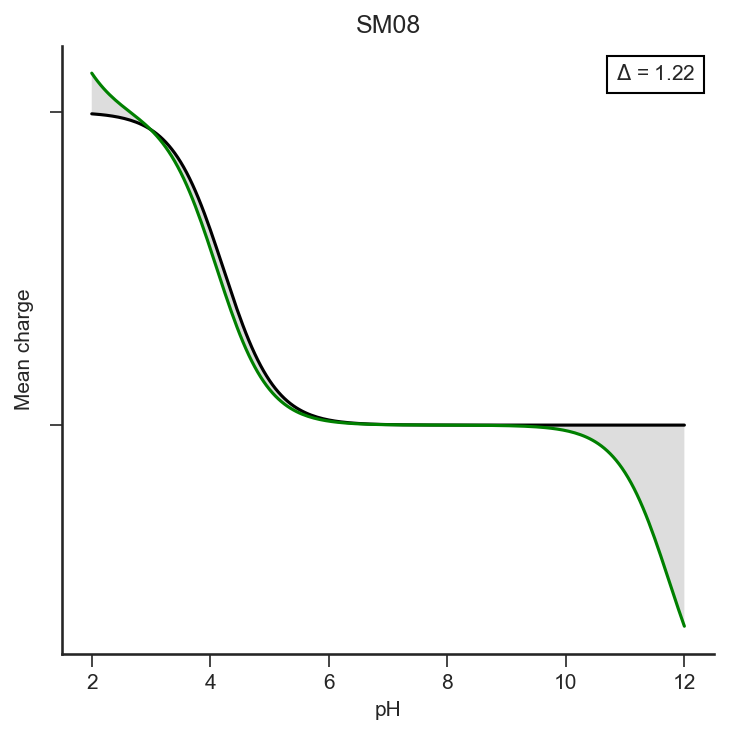

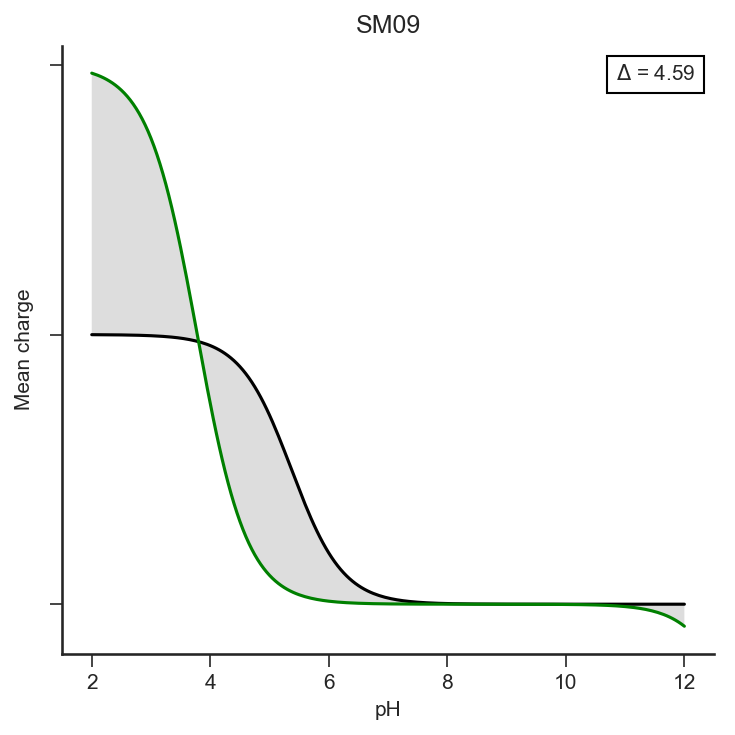

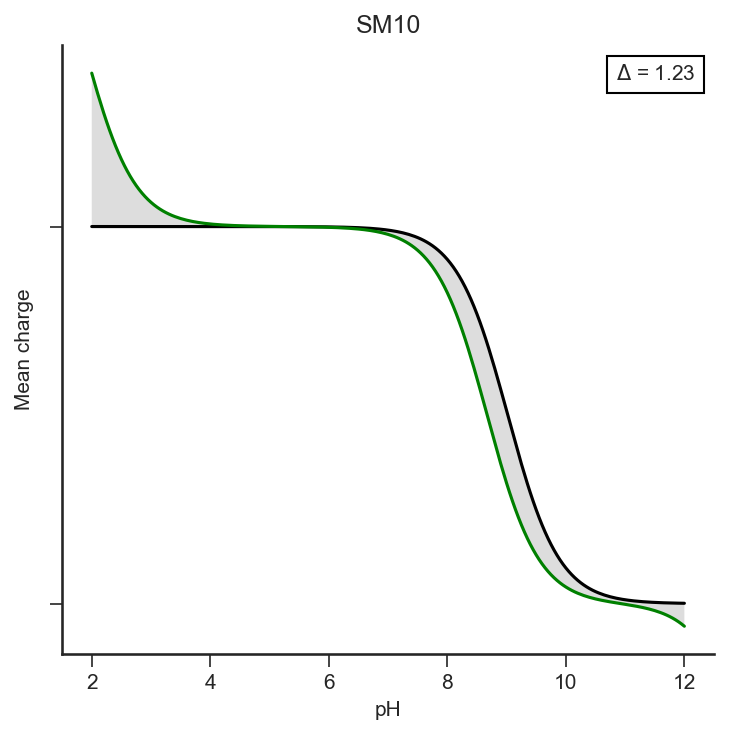

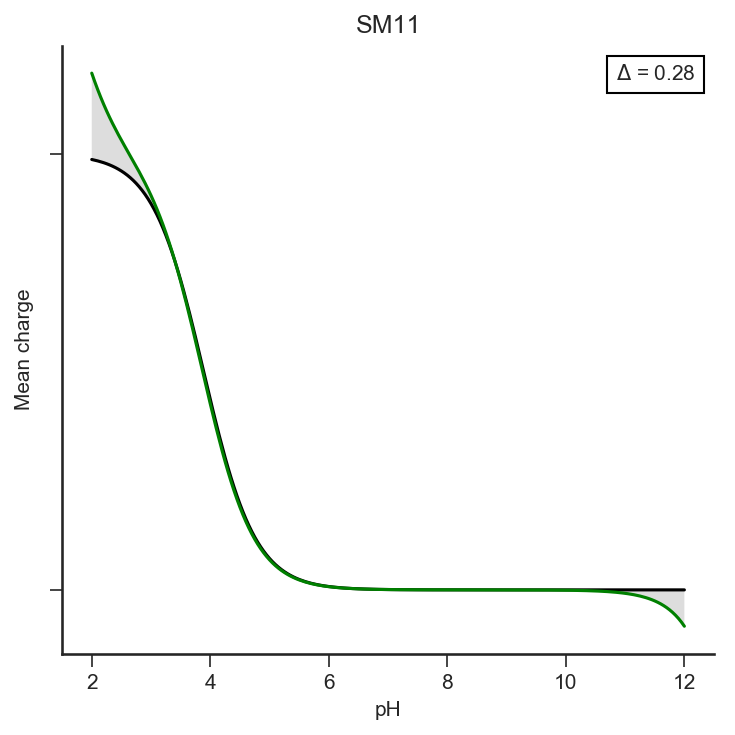

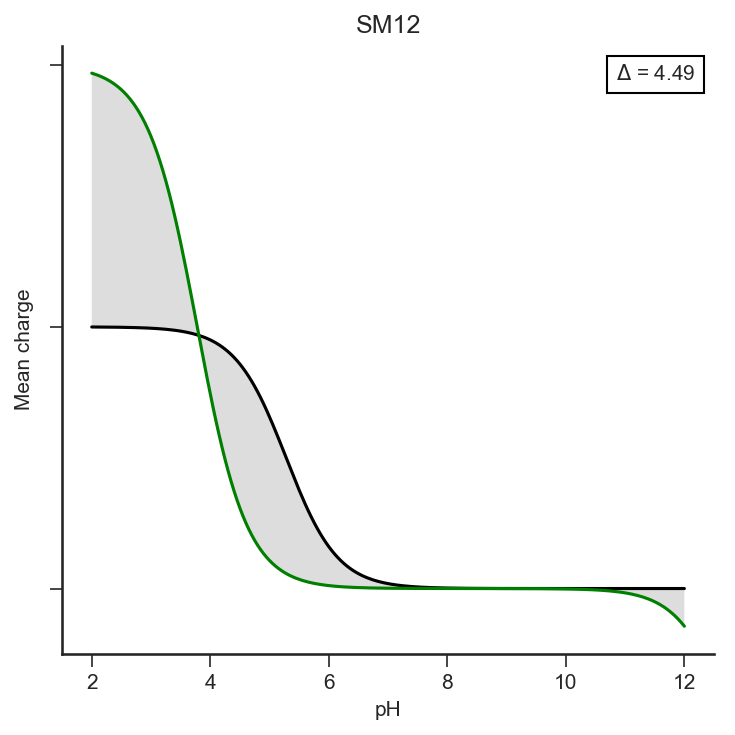

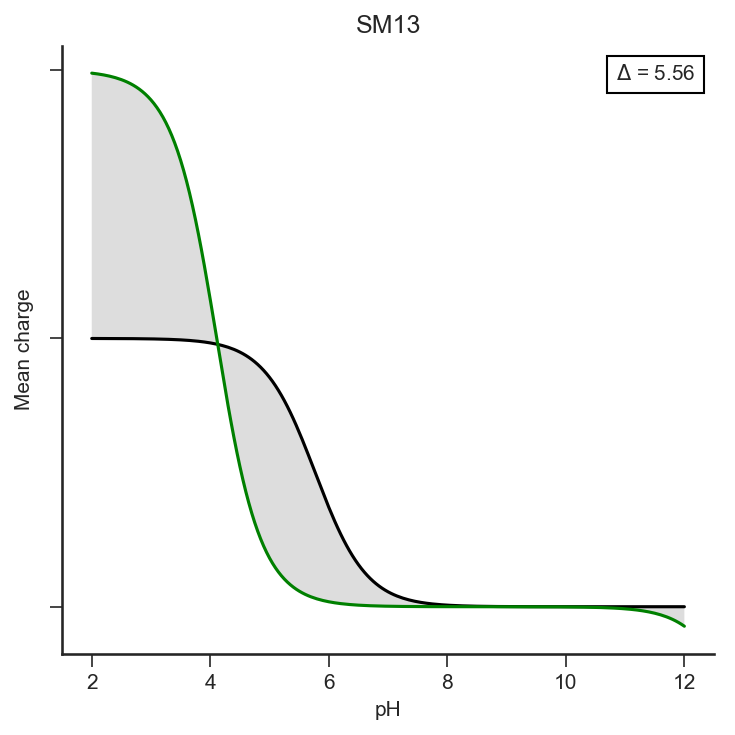

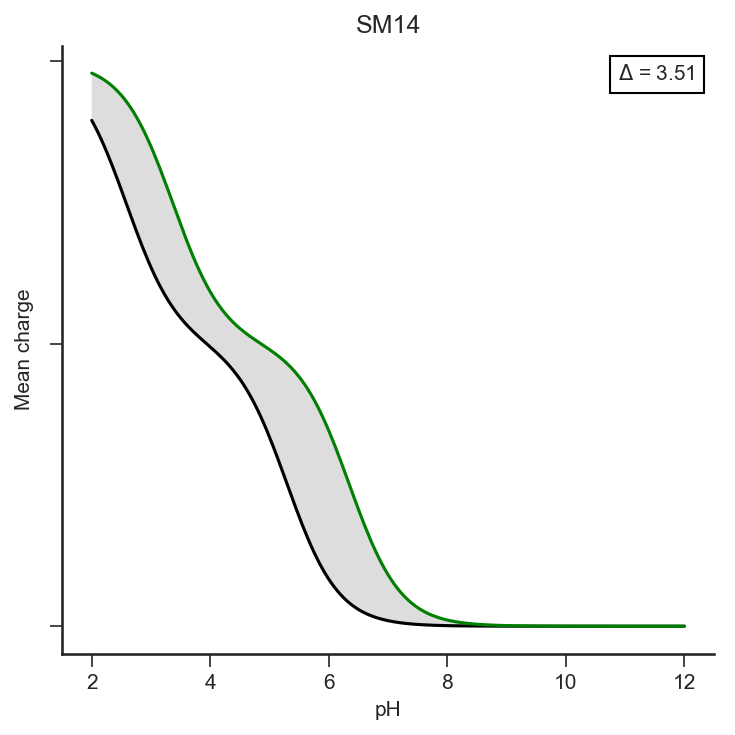

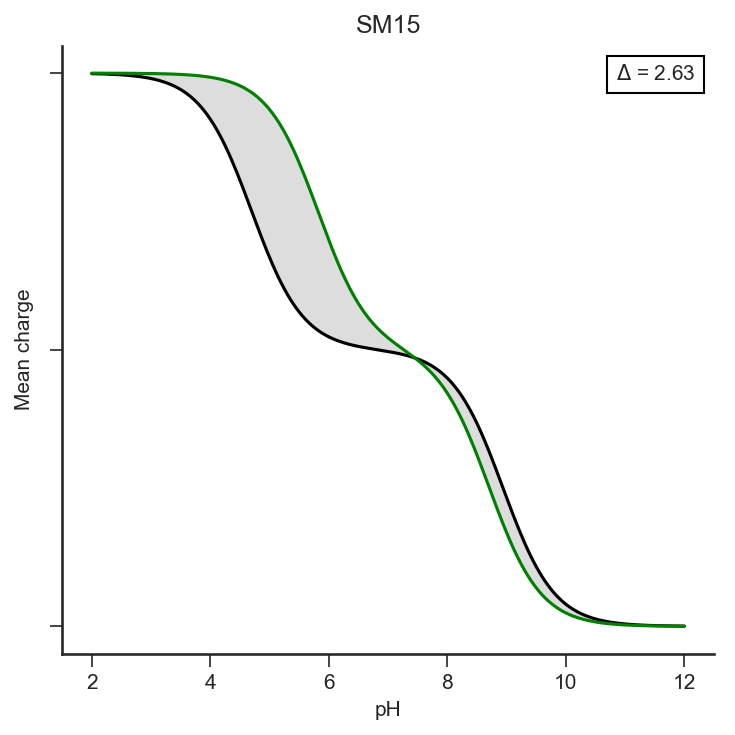

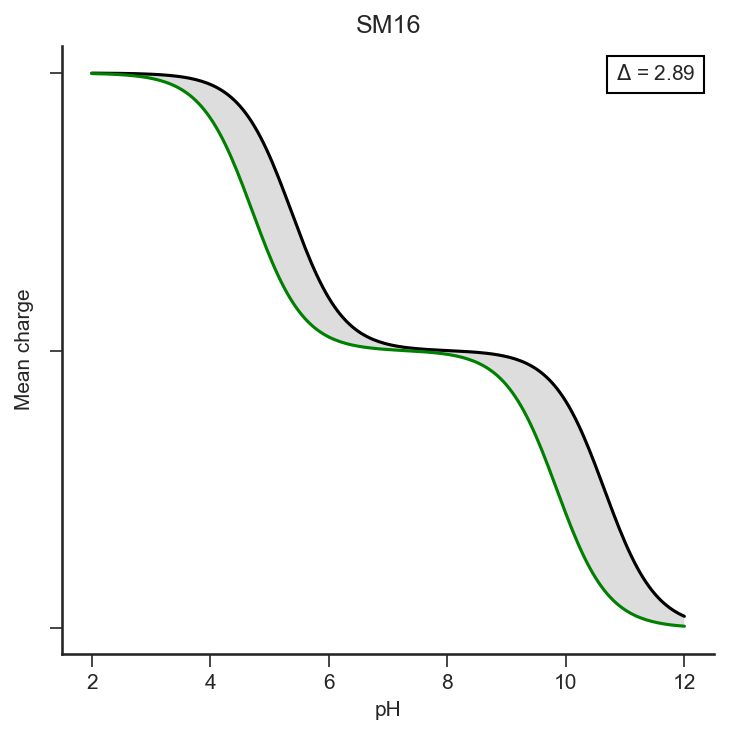

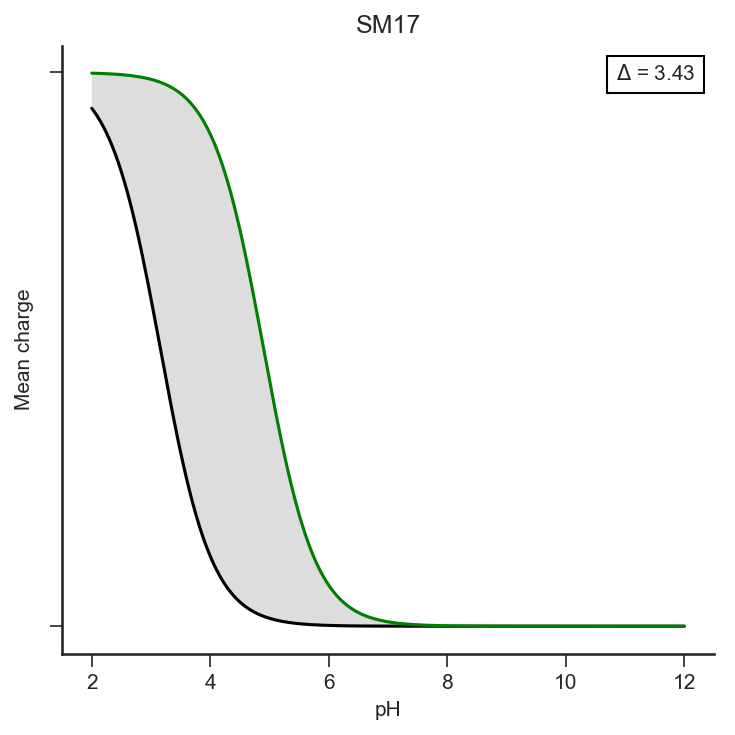

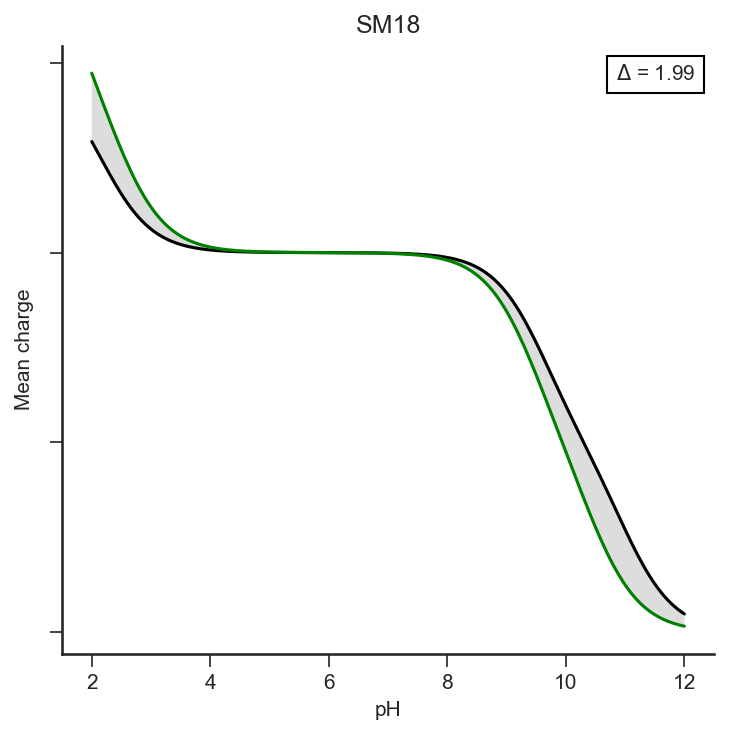

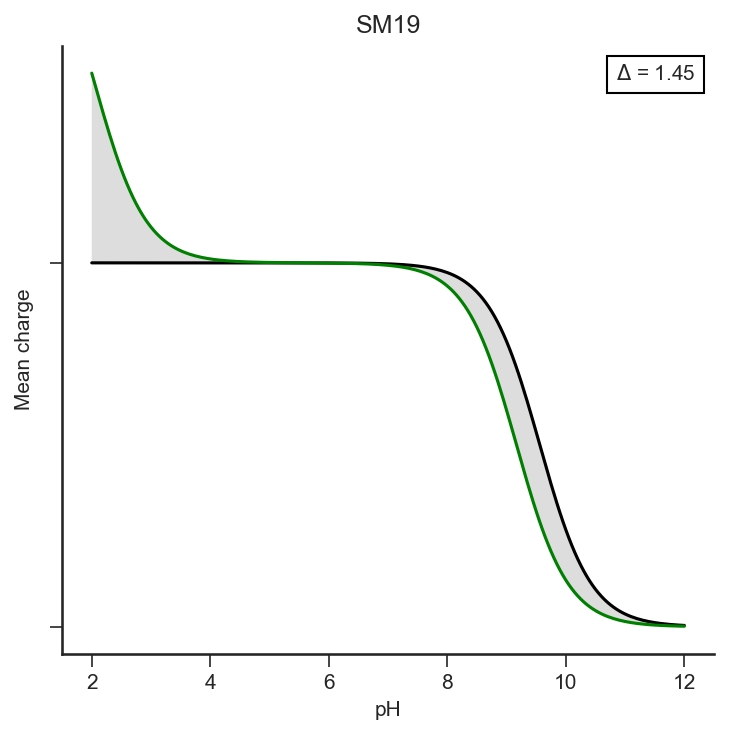

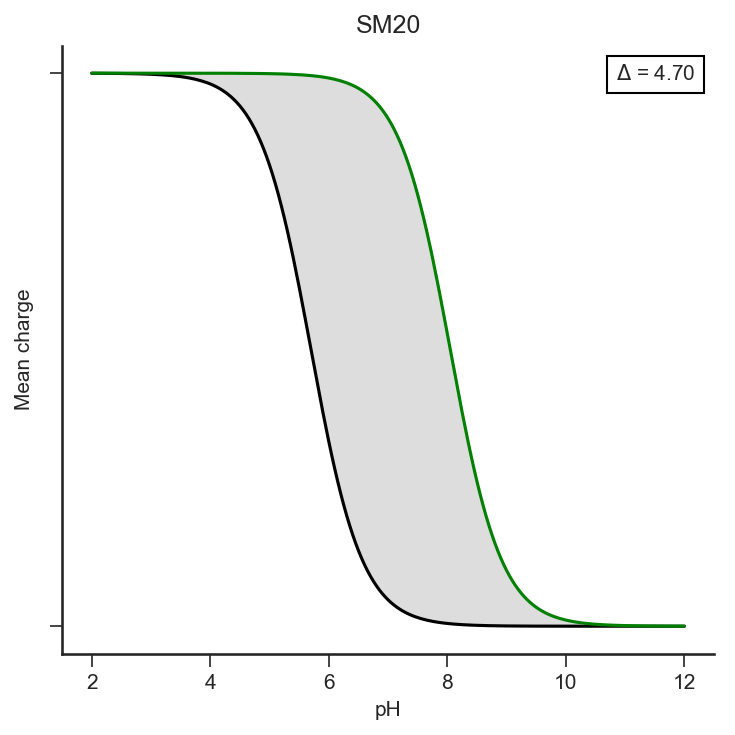

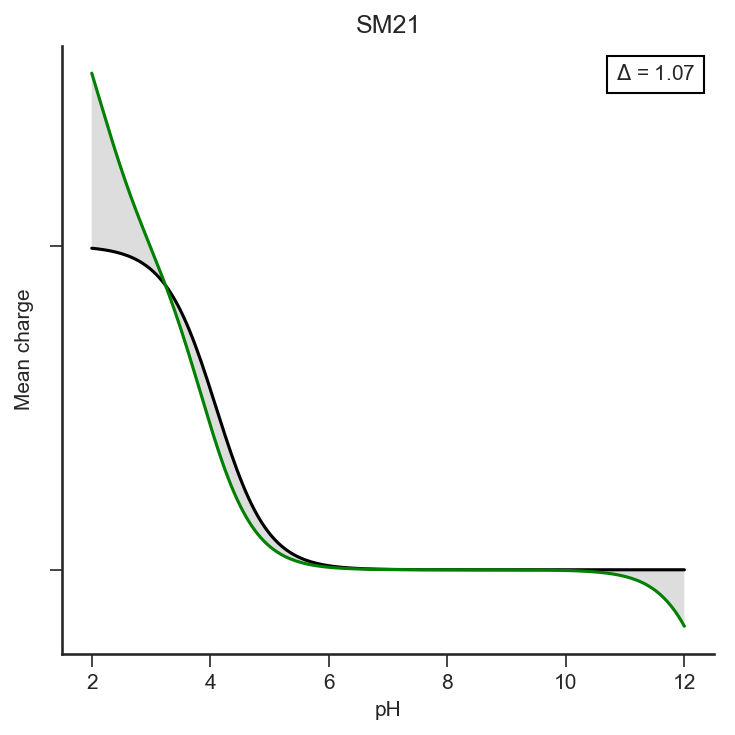

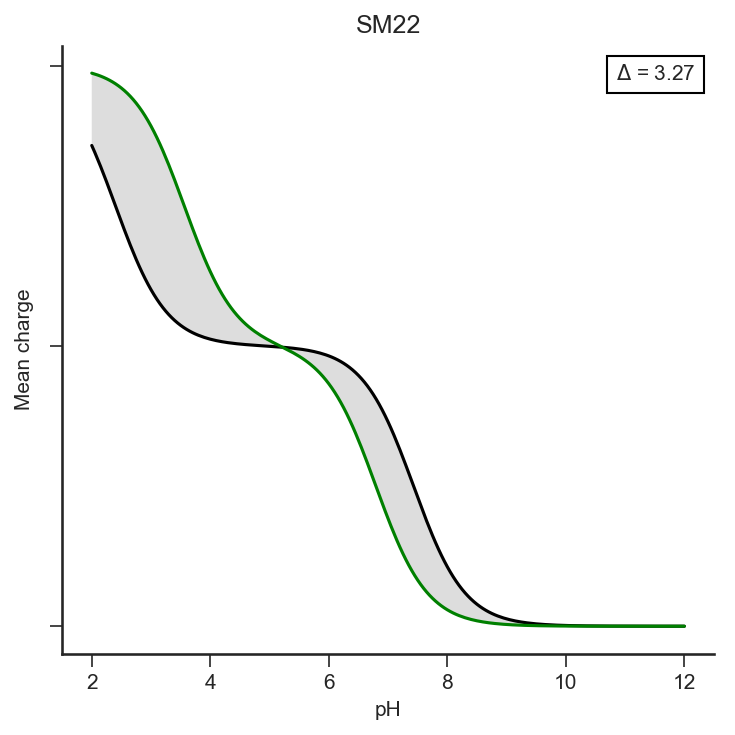

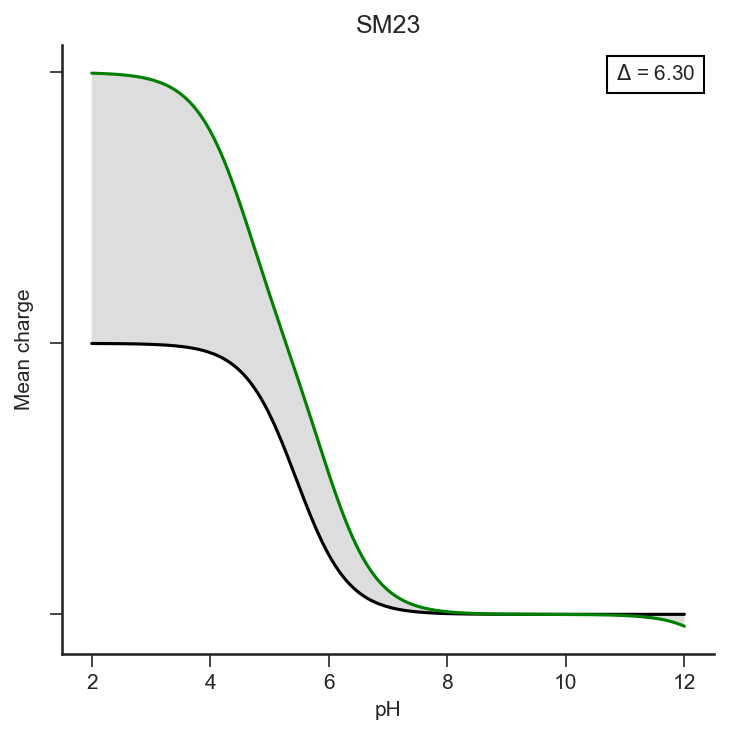

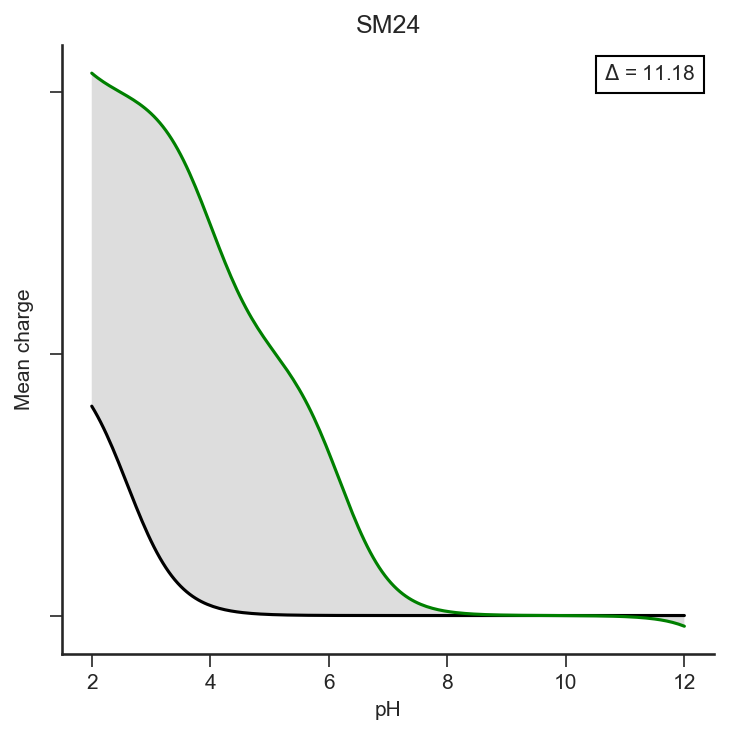

In [3]:
df_closest = pd.DataFrame(columns=["Molecule", ""])

for molecule in range(24):    
    mol_name = "SM{:02d}".format(molecule+1)
    print(mol_name)
    # Load dataset for this molecule
    experimental_curve = SAMPL6Experiment.from_id(mol_name)
    predicted_curve = TypeIIIPrediction.from_id(mol_name, "Epik/typeIII-raw-sequential.csv")
    
    # Align the predicted curve to the experimental curve
    predicted_curve.align_mean_charge(experimental_curve, area_between_curves, 0.1)
    
    # Plot the results
    fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi=150)
    
    # Shortcuts
    q1 = experimental_curve.mean_charge
    q2 = predicted_curve.mean_charge
    ph = experimental_curve.ph_values
    
    # Store the area information in a floating text box in the top right corner
    anchored_text = AnchoredText(r"$\Delta$ = {:.2f}".format(area_between_curves(q1,q2, 0.1)), loc=1)
    ax.add_artist(anchored_text)
    
    # Experiment a black solid curve, prediction is green
    ax.plot(ph,q1, color="black", label="Experiment")
    ax.plot(ph,q2, color="green", label="Epik scan")
    
    # Area between curves is colored in gray
    ax.fill_between(ph, q1, q2, facecolor="#dddddd", interpolate=True)
    
    
    # Integer labels for y axis
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    labels = [item.get_text() for item in ax.get_yticklabels()]
    empty_string_labels = ['']*len(labels)
    ax.set_yticklabels(empty_string_labels)
    ax.set_ylabel("Mean charge")
    ax.set_xlabel("pH")
    ax.set_title(mol_name)
    plt.xticks(np.arange(2.0, 14.0, 2.0))
    
    # remove top and right spines
    sns.despine()
    # fit everything within bounds
    plt.tight_layout()
    plt.savefig("{}-charge.png".format(mol_name))
